### Jupyterlab magic
Spodnja celica uvozi vse knjižnice (mogoče tudi kakšno preveč) in pripravi nastavitve, ki jih potrebujemo kasneje za računanje in risanje. Poženi pred čemerkoli drugim

In [3]:
import IPython.display as ipd
from math import pi
from numpy import *
from scipy.stats import norm
from scipy.constants import *
from scipy.io import wavfile
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib import rcParams as MpRcParams
MpRcParams['mathtext.fontset'] = 'cm'
MpRcParams['mathtext.rm'] = 'serif'
MpRcParams['mathtext.rm'] = 'serif'
%matplotlib inline

# Testiranje spektralnega prekrivanja

Če sestavimo zvočni signal iz dveh tonov, katerih frekvenca se malo razlikuje in je eden precej tišji od drugega, potem bo glasnejši ton maskiral tišjega. Večja kot je razlika v frekvenci tonov, manj izrazit je pojav.

Preizkusite koliko manjši mora biti maskirani signal pri različnih frekvencah in pri različnih razlikah v frekvenci, da ga ne zaznate. Testni signal je sestavljen iz šestih odsekov, kjer se izmenjujejo odseki s samo prvim tonom in z obema tonoma, da lažje ugotovimo ali slišimo maskirani ton ali ne. Pri prehodih med odseki je vedno manjši slišni pok, ker dolžina odseka ni dovolj točno nastavljena, da bi se sinusni signal vedno lepo zaključil.

Pri poslušanju je treba biti previden, ker ušesa hitro slišijo tudi kaj kar ne obstaja, če misliš, da moraš nekaj slišati. Zato preverite ali res še vedno slišite oba tona tudi tako, da drugi ton nastavite na absurdno nizko vrednost (pod -100 dB). Če se vam še vedno zdi, da slišite kombinacijo obeh tonov, vas ušesa varajo.

0.31622776601683794

0.03162277660168379

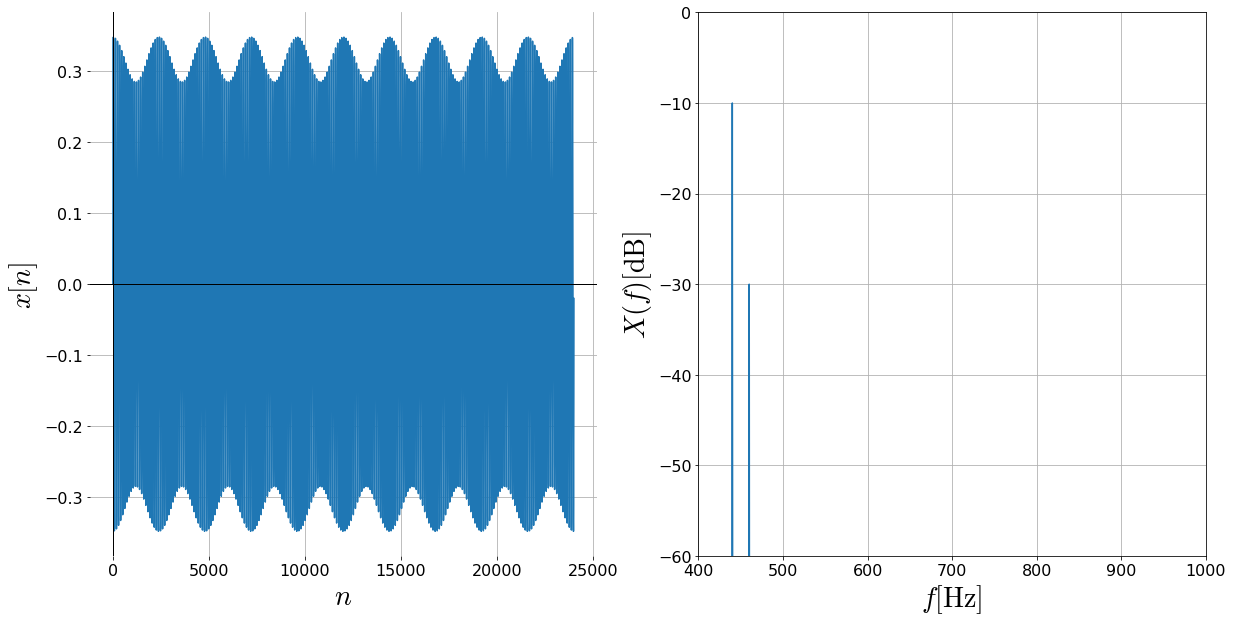

In [14]:
f1=440
f2=460
A1=-10   #dB (0 dB (vrednosti x[n] so -1 do +1)je maksimalna vrednost VSOTE OBEH signalov)
A2=A1-20   #dB
fs = 48000
length=0.50002   #s

n=arange(0,fs*length-1,1)
a1=10**(A1/20)
a2=10**(A2/20)
x1=a1*sin(2*pi*f1/fs*n)
x2=a2*sin(2*pi*f2/fs*n)

x=hstack((x1,x1+x2,x1,x1+x2,x1,x1+x2))
display(a1)
display(a2)

#pripravi frekvenčno os za risanje grafov
fX=fft.rfftfreq(x1.size)*fs   

#izračunaj spekter signala
X=20*log10(absolute(fft.rfft(x1+x2)/fs/length*2))

#Risanje
fig, ax= plt.subplots(1,2,figsize=(20,10))
ax[0].plot(x1+x2)
ax[0].axvline(0, color='black', lw=1)
ax[0].axhline(0, color='black', lw=1)
ax[0].set_ylabel(r'$x[n]$', fontsize=28)
ax[0].set_xlabel(r'$n$', fontsize=28)
ax[0].grid(which="both")
ax[0].set_frame_on(False)

ax[1].plot(fX,X)
ax[1].set_ylabel(r'$X(f) [\rm{dB}]$', fontsize=28)
ax[1].set_xlabel(r'$f [\rm{Hz}]$', fontsize=28)
ax[1].set_xlim([400,1000])
ax[1].set_ylim([-60,0])
ax[1].grid(which="both")

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

ipd.Audio(x,rate=fs,normalize=False)


# Testiranje časovnega maskiranja - postmasking

Če za močnim tonom nastopa po dovolj kratki pavzi še en mnogo tišji, drugega tona sploh ne zaznamo

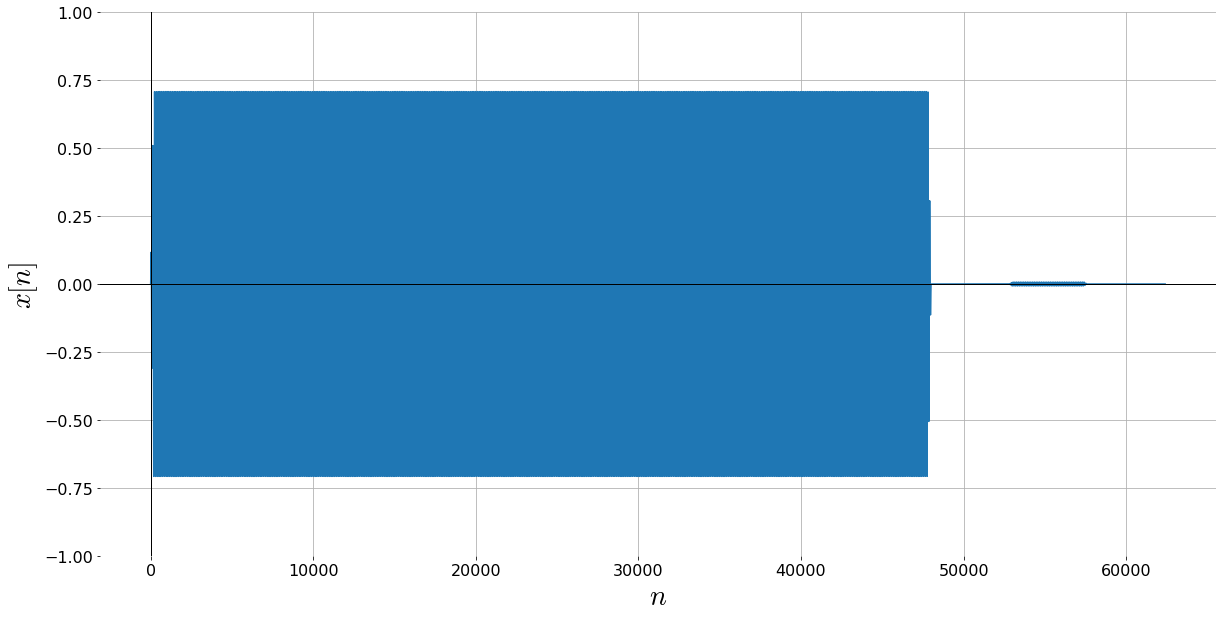

In [84]:
t1=1000  #ms - trajanje 1. tona
tp=100   #ms - pavza med obema tonoma
t2=100    #ms - trajanje 2. tona

f1=440
f2=440
A1=-3   #dB (0 dB (vrednosti x[n] so -1 do +1)je maksimalna vrednost VSOTE OBEH signalov)
A2=A1-40   #dB
fs = 48000

rampa = arange(0,fs*4/1000)   #funkcija za postopno dvigovanje in manjšanje glasnosti, da prehodi manj pokljajo
rampa = rampa/max(rampa)
Nr=size(rampa)

n1=arange(0,fs*t1/1000,1)
n2=arange(0,fs*t2/1000,1)
a1=10**(A1/20)
a2=10**(A2/20)

x1=a1*sin(2*pi*f1/fs*n1)
x1[0:Nr]=x1[0:Nr]*rampa
x1[-Nr:]=x1[-Nr:]*rampa[::-1]

xpause=zeros(int(fs*tp/1000))

x2=a2*sin(2*pi*f2/fs*n2)
x2[0:Nr]=x2[0:Nr]*rampa
x2[-Nr:]=x2[-Nr:]*rampa[::-1]

x=hstack((x1,xpause,x2,xpause))

#Risanje
fig, ax= plt.subplots(figsize=(20,10))
ax.plot(x)
ax.axvline(0, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
ax.set_ylim([-1,1])
ax.set_ylabel(r'$x[n]$', fontsize=28)
ax.set_xlabel(r'$n$', fontsize=28)
ax.grid(which="both")
ax.set_frame_on(False)

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

ipd.Audio(x,rate=fs,normalize=False)


# Testiranje časovnega maskiranja - premasking

Če pred močnim tonom nastopa še en mnogo tišji, prvega tona sploh ne zaznamo

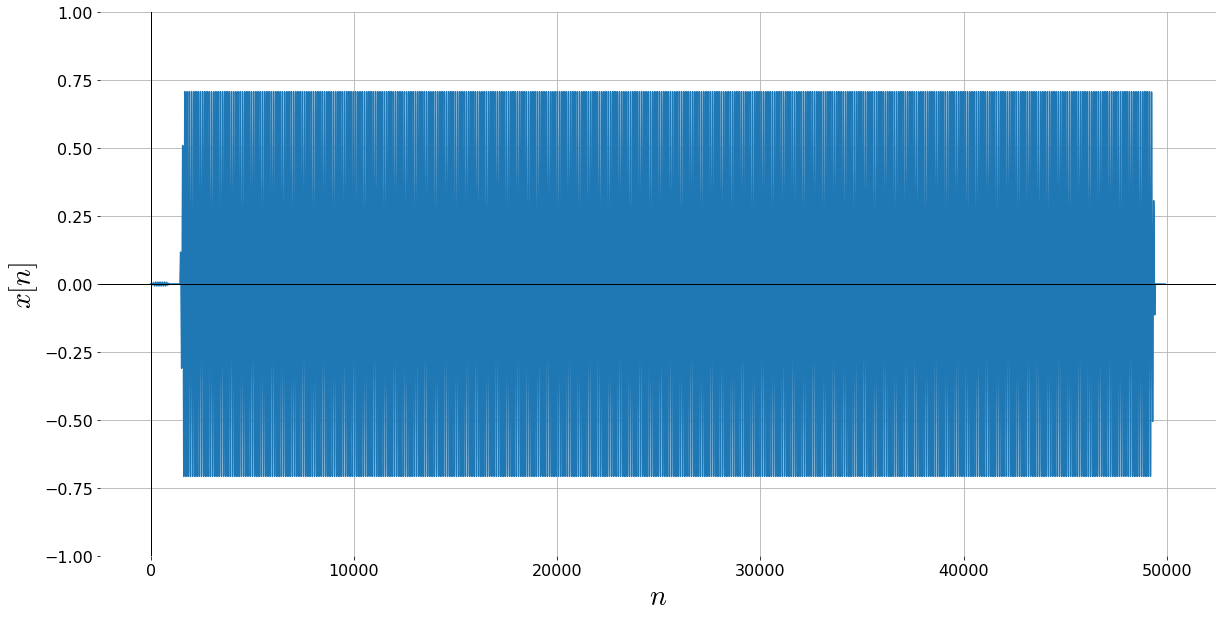

In [90]:
t1=20  #ms - trajanje 1. tona
tp=10   #ms - pavza med obema tonoma
t2=1000    #ms - trajanje 2. tona

f1=440
f2=440
A2=-3   #dB
A1=A2-40   #dB (0 dB (vrednosti x[n] so -1 do +1)je maksimalna vrednost VSOTE OBEH signalov)
fs = 48000

rampa = arange(0,fs*4/1000)   #funkcija za postopno dvigovanje in manjšanje glasnosti, da prehodi manj pokljajo
rampa = rampa/max(rampa)
Nr=size(rampa)

n1=arange(0,fs*t1/1000,1)
n2=arange(0,fs*t2/1000,1)
a1=10**(A1/20)
a2=10**(A2/20)

x1=a1*sin(2*pi*f1/fs*n1)
x1[0:Nr]=x1[0:Nr]*rampa
x1[-Nr:]=x1[-Nr:]*rampa[::-1]

xpause=zeros(int(fs*tp/1000))

x2=a2*sin(2*pi*f2/fs*n2)
x2[0:Nr]=x2[0:Nr]*rampa
x2[-Nr:]=x2[-Nr:]*rampa[::-1]

x=hstack((x1,xpause,x2,xpause))

#Risanje
fig, ax= plt.subplots(figsize=(20,10))
ax.plot(x)
ax.axvline(0, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
ax.set_ylim([-1,1])
ax.set_ylabel(r'$x[n]$', fontsize=28)
ax.set_xlabel(r'$n$', fontsize=28)
ax.grid(which="both")
ax.set_frame_on(False)

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 

ipd.Audio(x,rate=fs,normalize=False)


# Barkova skala

Barkova skala razdeli slišno področje v 24(25) frekvenčnih pasov, ki jih imenujemo kritični pasovi (Eberhard Zwicker, 1961). Poimenovana je po Heinrich Barkhausnu, ki je prvi predlagav meritev subjektivnega dojemanja glasnosti (a se ni ukvarjal s kritičnimi pasovi).

Za razdelitev slušnega območja v kritične pasove (ki je tako ali tako delno prilagodljivo, meje pa niso ostre) je več avtorjev predlagalo različne formule. Tu so narisane 3 variante.

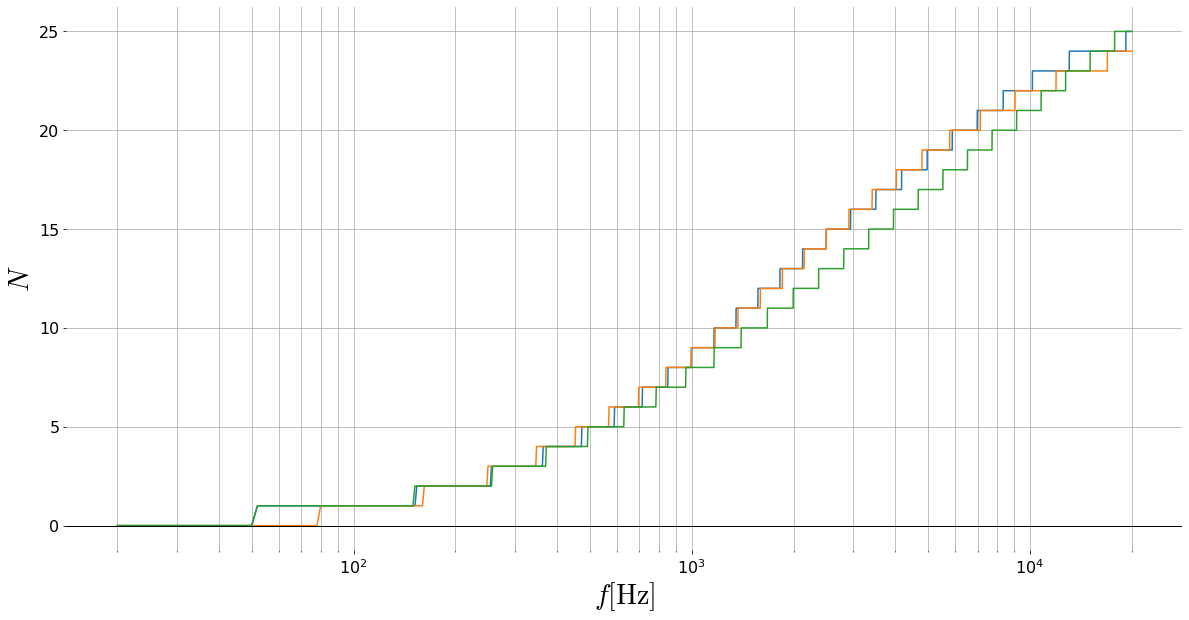

In [19]:
f=linspace(20,20000,10000)
B1=round_(13*arctan(0.00076*f)+3.5*arctan((f/7500)**2))
B2=round_((26.81*f)/(1960+f)-0.53)
B3=round_(6*arcsinh(f/600))
#Risanje
fig, ax= plt.subplots(figsize=(20,10))
ax.plot(f,B1)
ax.plot(f,B2)
ax.plot(f,B3)
ax.set_xscale("log")
ax.axvline(0, color='black', lw=1)
ax.axhline(0, color='black', lw=1)
ax.set_ylabel(r'$N$', fontsize=28)
ax.set_xlabel(r'$f[\rm{Hz}]$', fontsize=28)
ax.grid(which="both")
ax.set_frame_on(False)

plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16) 